In [0]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

---

In [0]:
def estimate_coefficients(x, y):
    # берем размер X
    size_x = np.size(x)

    # оцениваем среднейй
    mean_x, mean_y = np.mean(x), np.mean(y)

    # вычисляем стандартное отклонение и отклонение от x
    cross_deviation_xy = np.sum(y * x - size_x * mean_y * mean_x)
    cross_deviation_xx = np.sum(x * x - size_x * mean_x * mean_x)

    # вычисляем  коеф. регр. (по которым необходимо переместить линию регрессии)
    regr_coef_1 = cross_deviation_xy / cross_deviation_xx
    regr_coef_0 = mean_y - regr_coef_1 * mean_x

    return regr_coef_0, regr_coef_1

In [0]:
def plot(x, y, b):
    plt.scatter(x, y, color='b', marker='o')

    y_pred = b[0] + b[1] * x

    plt.plot(x, y_pred, color='r')

    plt.xlabel('size')
    plt.ylabel('cost')

    #plt.show()

In [0]:
# основная ф-я, которая генерит случайные (x,y) и строить уже готовый график с коэфф.
def main():
    # генерим массив случайных целых чисел
    x = np.array(np.random.randint(100, size=20))
    y = np.array(np.random.randint(100, size=20))
    print('вектор x: ', x)
    print('вектор y: ', y)

    estimate_coef = estimate_coefficients(x, y)
    print('коэффициенты: ({},{})'.format(estimate_coef[0], estimate_coef[1]))

    plot(x, y, estimate_coef)

вектор x:  [38 51 83 85 69 95 84  4 97 26  1 38 18 26 49 11 71 14 63 95]
вектор y:  [44 78 19 34 68  6 13 36 35 74 93 76 21 63  4 45 15 94 16 89]
коэффициенты: (-1.3773781565604182,0.9337402388322282)


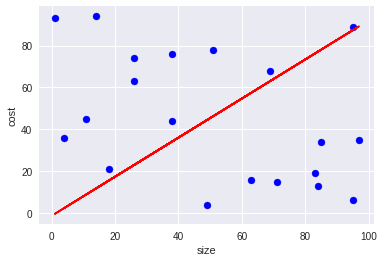

In [0]:
main()

---

### Теперь воспользуемся готовой либой и предскажем для новых данных

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
# x от 0 до 30
x = 30 * np.random.random((20))
x

array([ 4.08154121,  4.08391509,  0.28574237,  1.63193593, 12.25687951,
        9.4417299 , 18.88629521, 21.88538582, 10.24350093, 27.78842612,
       12.0937046 , 20.28864455, 14.24645966, 21.01754406, 16.5839162 ,
       15.32813208, 11.90398011, 23.89231236, 26.63649006, 17.68922977])

In [0]:
# y = a*x + b с небольшим шумомм
y = 0.5 * x + 1.0 + np.random.normal(size=x.shape)
y

array([ 2.27686929,  3.64536138,  0.4746427 ,  3.56564275,  5.72301728,
        5.40127527, 11.03042027, 12.68130988,  5.00082778, 15.5128685 ,
        7.35214252, 10.91117042,  9.17243812, 11.86042843,  8.78587746,
        6.85690935,  6.42145751, 11.56146502, 14.21715127,  8.47941333])

In [0]:
# создаем и обучаем модель
reg = LinearRegression()
model = reg.fit(x, y)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
# предсказываем для новых данных с помощью `model.predict()`
x_new = np.linspace(0, 30, 100)
y_new = model.predict(x_new[:, np.newaxis])
len(x_new), len(y_new)

(100, 100)

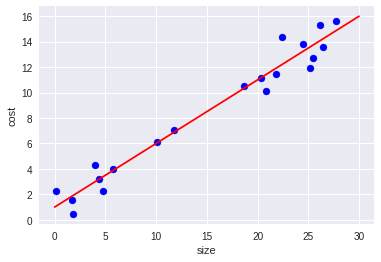

In [0]:
plt.xlabel('size')
plt.ylabel('cost')
plt.scatter(x, y,color='b')

plt.plot(x_new, y_new,color='r')

---

### Простое задание:
построить лин рег с помощью numpy

In [0]:
def estimate_coefficients_with_np(x, y):
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    return m, c

In [0]:
# основная ф-я, которая генерит случайные (x,y) и строить уже готовый график с коэфф.
def main():
    # генерим массив случайных целых чисел
    x = np.array(np.random.randint(100, size=100))
    y = 0.5 * x + 3.0 + np.random.normal(size=x.shape)
    print('вектор x: ', x, '\n')
    print('вектор y: ', y, '\n')

    m, c = estimate_coefficients_with_np(x, y)
    print('коэффициенты: ({},{})'.format(m, c))

    plt.plot(x, y, 'o', label='Original data', markersize=5)
    plt.plot(x, m*x + c, 'r', label='Fitted line')
    plt.legend()
    plt.show()

вектор x:  [94 47 50 81 55 20 91 76 19 12 30 35 13 71 53 96 22 58 85 35 23 82 93 81
 91 41 93 83 86 38 23 22 84 87 17 59 99 70 74 47 54  9  6 23 41 81 49 24
 83 39 85 12 72 83 76 49 35 94 82 39 35 97 43  4  5 81 17 13 15 78 58 55
 27  0 76  3 55 74 75 60 68 32 30 83 81 25  3 56 94 49 38 83 82 57 41 47
 57  9 62 30] 

вектор y:  [49.60035602 27.1165044  26.65205565 42.88821116 30.58286404 11.37110428
 47.78595918 40.66085931 13.60233454 10.75506354 18.35807137 20.44241685
 10.46248793 38.86589842 29.41882832 52.01504606 13.09165757 30.73668672
 45.5361983  20.93683129 14.03096763 43.09349949 49.76445278 43.29572786
 47.40807782 23.76138492 47.71792034 44.54264988 45.0293847  20.04250479
 13.10162784 12.52958995 44.36956829 46.29246069 11.93131793 31.70851513
 51.37650979 38.73300578 40.02455283 26.12102202 30.84265413  9.97953356
  8.15779655 15.34712599 24.64714116 42.82830684 26.30565013 16.59415418
 43.45745148 22.94551486 45.05732055  9.2670598  40.02433877 45.39605559
 42.37384524 

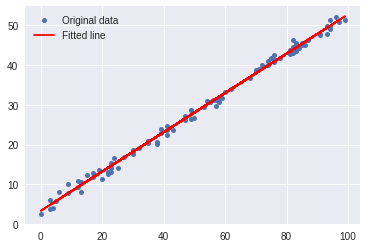

In [0]:
main()